**Name** - Prathamesh .P. Niungare <br>
**Roll no.**- 50 <br>
**EXP 3**- Linear Regression: Parameter Estimation using OLS,MLE, and Gradient Descent.<br>

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
X = np.array([1,2,3]).reshape(-1, 1)    # input
y = np.array([2,3,5])                   # output.

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [16]:
b = model.intercept_
w = model.coef_[0]

In [17]:
print(f"(slope) w: {w}")
print(f"(intercept) b: {b}")

(slope) w: 1.4999999999999998
(intercept) b: 0.3333333333333339


In [18]:
y_pred = model.predict(X)
print("\nPredictions for training data:`")
for xi,yi,ypi in zip(X.flatten(), y, y_pred):
    print(f"for x={xi}, true y={yi}, predicted y={ypi}")


Predictions for training data:`
for x=1, true y=2, predicted y=1.8333333333333337
for x=2, true y=3, predicted y=3.3333333333333335
for x=3, true y=5, predicted y=4.833333333333333


In [ ]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"\nMean Squared Error: {mse:4f}")
print(f"R^2 Score: {r2:4f}")


Mean Squared Error: 0.05555555555555558
R^2 Score: 0.9642857142857143


**MLE** 

In [ ]:
import numpy as np
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error, r2_score

X = np.array([1, 2, 3])  # 1D array, shape (3,)
y = np.array([2, 3, 5])  # target values



(MLE slope) w: 1.5000
(MLE intercept) b: 0.3333

Predictions for training data using MLE:
X=1, Actual y=2, Predicted y=1.83
X=2, Actual y=3, Predicted y=3.33
X=3, Actual y=5, Predicted y=4.83

Mean Squared Error (MLE): 0.0556
R^2 Score (MLE): 0.9643


In [ ]:
def neg_log_likelihood(params):
    w, b = params
    sigma2 = 1  # fixed variance
    y_pred = w * X + b
    nll = 0.5 * np.sum((y - y_pred)**2) / sigma2
    return nll

In [36]:
initial_guess = [0, 0]
result = minimize(neg_log_likelihood, initial_guess)
w_mle, b_mle = result.x

print(f"(MLE slope) w: {w_mle:.4f}")
print(f"(MLE intercept) b: {b_mle:.4f}")


(MLE slope) w: 1.5000
(MLE intercept) b: 0.3333


In [37]:
y_pred = w_mle * X + b_mle
print("\nPredictions for training data using MLE:")
for xi, yi, ypi in zip(X, y, y_pred):
    print(f"X={xi}, Actual y={yi}, Predicted y={ypi:.2f}")

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"\nMean Squared Error (MLE): {mse:.4f}")
print(f"R^2 Score (MLE): {r2:.4f}")


Predictions for training data using MLE:
X=1, Actual y=2, Predicted y=1.83
X=2, Actual y=3, Predicted y=3.33
X=3, Actual y=5, Predicted y=4.83

Mean Squared Error (MLE): 0.0556
R^2 Score (MLE): 0.9643


**Gradient Descent**

In [45]:
w,b = 0,0
alpha = 0.0001
n_iter = 1000
n = len(X)

for i in range(n_iter):
    y_pred = w*X.flatten() + b
    dw = (-2/n) * np.sum(X.flatten() * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)
    w -= alpha * dw
    b -= alpha * db

print(f"(slope) w: {w}")
print(f"(intercept) b: {b}")
y_pred = w * X.flatten() + b
print("\nPredictions for training data using Gradient Descent:")
for xi, yi, ypi in zip(X.flatten(), y, y_pred):
    print(f"X={xi}, Actual y={yi}, Predicted y={ypi:.2f}")

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)


(slope) w: 0.9277932204091286
(intercept) b: 0.4003820339618283

Predictions for training data using Gradient Descent:
X=1, Actual y=2, Predicted y=1.33
X=2, Actual y=3, Predicted y=2.26
X=3, Actual y=5, Predicted y=3.18


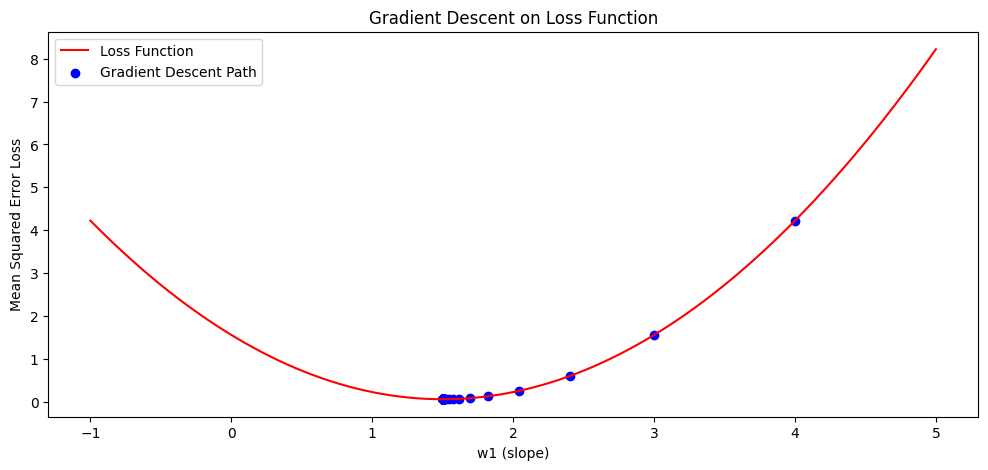

In [48]:
from matplotlib import pyplot as plt

X = np.array([1,2,3])
y = np.array([2,3,5])

def loss(w1):
    w0= np.mean(y) - w1 * np.mean(X)
    y_pred = w1 * X + w0
    return np.mean((y - y_pred)**2)

def gradient(w1):
    w0= np.mean(y) - w1 * np.mean(X)
    y_pred = w1 * X + w0
    return (-2) * np.sum(X * (y - y_pred))

lr = 0.1
w1 = 4
iterations = 1000

w1_values = []
loss_values = []

for i in range(iterations):
    w1_values.append(w1)
    loss_values.append(loss(w1))
    grad = gradient(w1)
    w1 -= lr * grad

w_space = np.linspace(-1, 5, 100)
loss_space = [loss(w1) for w1 in w_space]

plt.figure(figsize=(12, 5))
plt.plot(w_space, loss_space, label='Loss Function', color='red')
plt.scatter(w1_values, loss_values, color='blue', label='Gradient Descent Path')
plt.xlabel('w1 (slope)')
plt.ylabel('Mean Squared Error Loss')
plt.title('Gradient Descent on Loss Function')
plt.legend()
plt.show()



